# Solution for assignment

For most exercises are multiple solutions possible. This notebook contains one solution per exercise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

star_type = {
    "Star type": [0, 1, 2, 3, 4, 5],
    "Star names": [
        "Red Dwarf", 
        "Brown Dwarf", 
        "White Dwarf", 
        "Main Sequence",
        "SuperGiants", 
        "HyperGiants",
    ]
}

## Exercise 1
- Create a dataframe from dictionary `star_type`.  
- The repository contains a file `star_dataset.csv`. Each row in this csv file represents a single star. Create a dataframe from `star_dataset.csv`. 
- Merge both dataframes on column `Star type` to create dataframe `df_stars`.

In [2]:
# Create dataframes
df_star_type = pd.DataFrame(star_type)
df_dataset = pd.read_csv('star_dataset.csv')

# Merge dataframes
df_stars = pd.merge(df_star_type, df_dataset, how='outer', on='Star type')
df_stars

,Star type,Star names,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,0,Red Dwarf,3068,0.002400,0.1700,16.12,Red,M
1,0,Red Dwarf,3042,0.000500,0.1542,16.60,Red,M
2,0,Red Dwarf,2600,0.000300,0.1020,18.70,Red,M
3,0,Red Dwarf,2800,0.000200,0.1600,16.65,Red,M
4,0,Red Dwarf,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...,...,...
235,5,HyperGiants,38940,374830.000000,1356.0000,-9.93,Blue,O
236,5,HyperGiants,30839,834042.000000,1194.0000,-10.63,Blue,O
237,5,HyperGiants,8829,537493.000000,1423.0000,-10.73,White,A
238,5,HyperGiants,9235,404940.000000,1112.0000,-11.23,White,A


## Excercise 2
Get the minimum and maximum temperature of `df_stars`.

In [3]:
print("min: ", df_stars['Temperature (K)'].min())
print("max: ", df_stars['Temperature (K)'].max())

min:  1939
max:  40000


## Excercise 3
Count the number of stars (rows) per star name.

In [4]:
print(df_stars['Star names'].value_counts())

HyperGiants      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
SuperGiants      40
Brown Dwarf      40
Name: Star names, dtype: int64


## Excercise 4
Plot a histogram of the luminosity in `df_stars`. 

<AxesSubplot:ylabel='Frequency'>

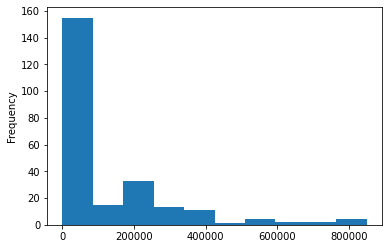

In [5]:
plt.figure()
df_stars['Luminosity(L/Lo)'].plot.hist()

## Excercise 5
Count the stars with name `White Dwarf` and a radius bigger than `0.012`.

In [6]:
df_selection = df_stars[(df_stars["Star names"]=="White Dwarf") & (df_stars["Radius(R/Ro)"]>0.012)]
len(df_selection)

10

## Excercise 6
- Print a list of unique star colors. 
- Clean the colors column by fixing the lowercase/highercase, whitespace/dash and trailing whitespace naming problems. 
- Print the new list of unique star colors. 

In [7]:
df_stars_unique = df_stars['Star color'].unique()
print(f"Star colors unique ({len(df_stars_unique)}): {df_stars_unique}")
print()

df_stars['Star color'] = df_stars['Star color'].str.lower()
df_stars['Star color'] = df_stars['Star color'].str.rstrip()
df_stars['Star color'] = df_stars['Star color'].str.replace(' ','-')

df_stars_unique = df_stars['Star color'].unique()
print(f"Star colors clean ({len(df_stars_unique)}): {df_stars_unique}")

Star colors unique (19): ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'White-Yellow' 'white' 'Blue ' 'Blue' 'Blue white '
 'Blue-white' 'Whitish' 'yellow-white' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue-White' 'Orange']

Star colors clean (12): ['red' 'blue-white' 'white' 'yellowish-white' 'pale-yellow-orange'
 'white-yellow' 'blue' 'whitish' 'yellow-white' 'yellowish' 'orange-red'
 'orange']


## Excercise 7
Print the star name or names (**!**) that occur most often per star color.

In [8]:
colors = df_stars['Star color'].unique()
for color in colors:    
    df_star_color = df_stars[df_stars['Star color']==color]
    
    serie_stars = df_star_color['Star names'].value_counts()    
    serie_stars = serie_stars[serie_stars == serie_stars.max()]
    
    for count, star in zip(serie_stars, serie_stars.index):
        print(f"{color}:  {star} ({count}x)")

red:  Red Dwarf (40x)
red:  Brown Dwarf (40x)
blue-white:  Main Sequence (21x)
white:  White Dwarf (8x)
yellowish-white:  White Dwarf (3x)
pale-yellow-orange:  White Dwarf (1x)
white-yellow:  White Dwarf (1x)
blue:  SuperGiants (31x)
whitish:  Main Sequence (2x)
yellow-white:  Main Sequence (8x)
yellowish:  Main Sequence (3x)
orange-red:  Main Sequence (1x)
orange:  HyperGiants (2x)
